In [1]:
# Setup
import pandas as pd
import numpy as np
from stats_compass_core.state import DataFrameState
from stats_compass_core.data.load_dataset import load_dataset, LoadDatasetInput

# Create a fresh state
state = DataFrameState()
print("State initialized!")

State initialized!


## 1. EDA Report Workflow

The `run_eda_report` workflow generates a comprehensive exploratory data analysis including:
- Descriptive statistics
- Correlation analysis
- Missing data analysis
- Data quality report
- Histograms and bar charts

In [2]:
# Load the Housing dataset for EDA
result = load_dataset(state, LoadDatasetInput(name="Housing", set_active=True))
print(result.message)

Loaded dataset 'Housing' with 545 rows and 13 columns.


In [3]:
from stats_compass_core.workflows import run_eda_report, EDAConfig
from stats_compass_core.workflows.eda_report import RunEDAReportInput

# Run EDA report with custom config
eda_result = run_eda_report(state, RunEDAReportInput(
    dataframe_name="Housing",
    config=EDAConfig(
        include_describe=True,
        include_correlations=True,
        include_missing_analysis=True,
        generate_histograms=True,
        max_histograms=3,
        generate_bar_charts=False,
    )
))

print(f"Status: {eda_result.status}")
print(f"Duration: {eda_result.total_duration_ms}ms")
print(f"\nSteps:")
for step in eda_result.steps:
    icon = "✓" if step.status == "success" else "✗"
    print(f"  {icon} {step.step_name}: {step.status}")
print(f"\nCharts generated: {len(eda_result.artifacts.charts)}")

Status: success
Duration: 226ms

Steps:
  ✓ describe: success
  ✓ correlations: success
  ✓ analyze_missing_data: success
  ✓ data_quality_report: success
  ✓ histogram_price: success
  ✓ histogram_area: success
  ✓ histogram_bedrooms: success

Charts generated: 3



📊 Histogram of price


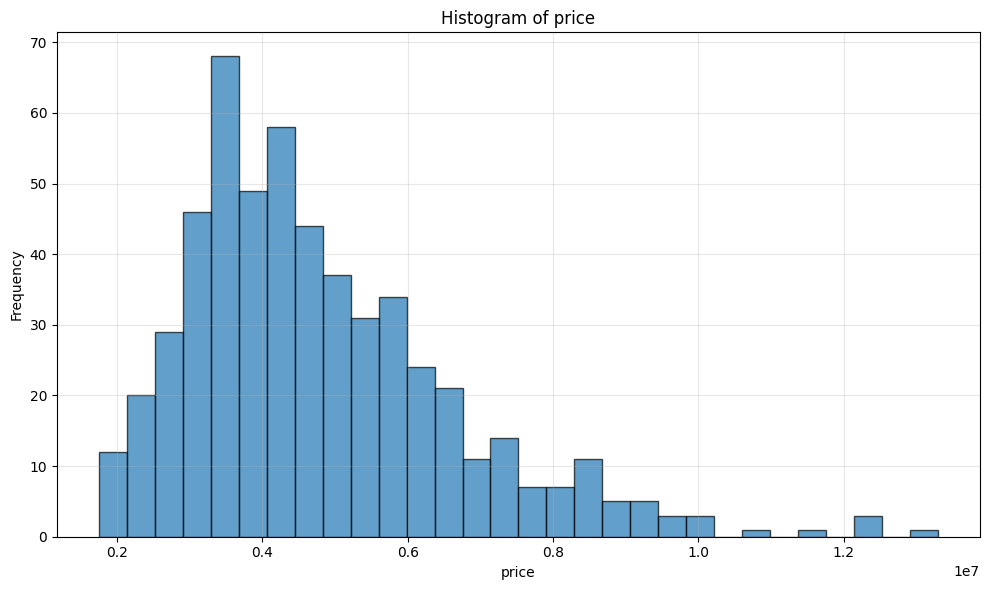


📊 Histogram of area


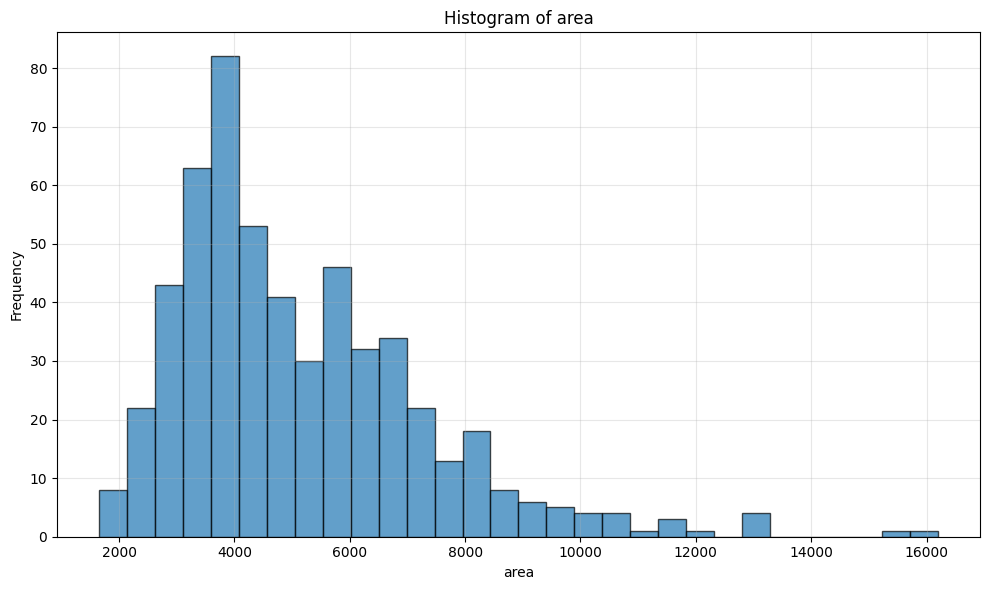


📊 Histogram of bedrooms


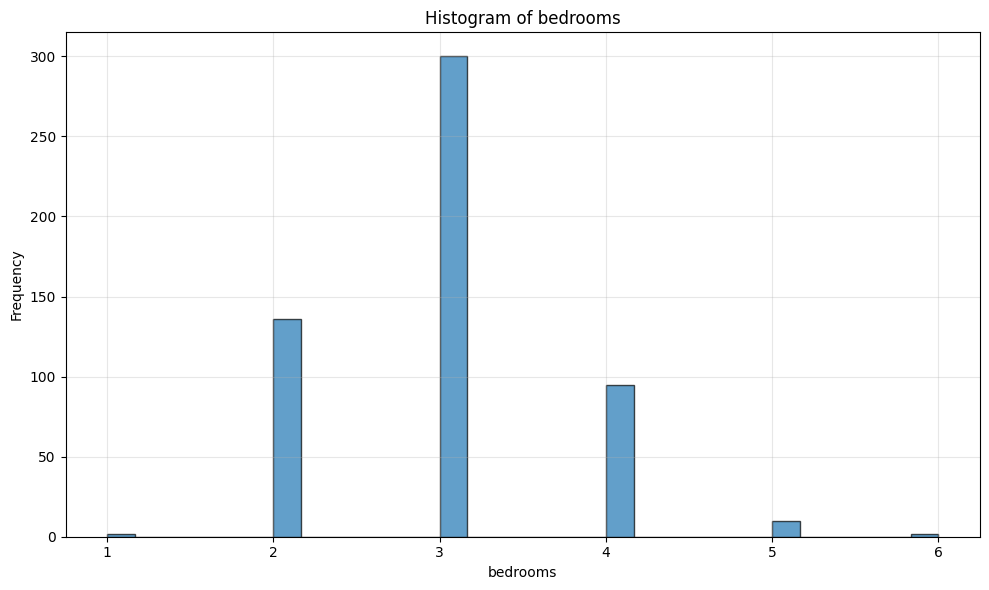

In [4]:
# Display EDA charts
from IPython.display import display, Image
import base64

for chart in eda_result.artifacts.charts:
    print(f"\n📊 {chart.title or chart.chart_type}")
    if chart.description:
        print(f"   {chart.description}")
    if chart.base64_image:
        display(Image(data=base64.b64decode(chart.base64_image)))

## 2. Preprocessing Workflow

The `run_preprocessing` workflow handles common data cleaning tasks:
- Missing value imputation
- Outlier detection and handling
- Duplicate removal
- Categorical encoding

In [5]:
# Create a dirty dataset for preprocessing demo
dirty_data = pd.DataFrame({
    "age": [25, 30, None, 45, 50, 35, None, 40, 28, 55],
    "salary": [50000, 60000, 55000, None, 80000, 65000, 70000, None, 52000, 90000],
    "department": ["Sales", "Engineering", "Sales", "HR", "Engineering", None, "Sales", "HR", "Sales", "Engineering"],
    "performance_score": [3.5, 4.2, 3.8, 4.0, 4.5, 3.9, 4.1, 3.7, 3.6, 4.8],
})

state.set_dataframe(dirty_data, "employee_data", operation="demo")
print("Dirty data:")
print(dirty_data.to_string())
print(f"\nMissing values:\n{dirty_data.isnull().sum()}")

Dirty data:
    age   salary   department  performance_score
0  25.0  50000.0        Sales                3.5
1  30.0  60000.0  Engineering                4.2
2   NaN  55000.0        Sales                3.8
3  45.0      NaN           HR                4.0
4  50.0  80000.0  Engineering                4.5
5  35.0  65000.0         None                3.9
6   NaN  70000.0        Sales                4.1
7  40.0      NaN           HR                3.7
8  28.0  52000.0        Sales                3.6
9  55.0  90000.0  Engineering                4.8

Missing values:
age                  2
salary               2
department           1
performance_score    0
dtype: int64


In [6]:
from stats_compass_core.workflows import run_preprocessing, PreprocessingConfig, ImputationConfig
from stats_compass_core.workflows.preprocessing import RunPreprocessingInput

# Run preprocessing
preprocess_result = run_preprocessing(state, RunPreprocessingInput(
    dataframe_name="employee_data",
    config=PreprocessingConfig(
        imputation=ImputationConfig(
            strategy="mean",  # Use mean for numeric columns
        ),
        dedupe=True,
    )
))

print(f"Status: {preprocess_result.status}")
print(f"\nSteps:")
for step in preprocess_result.steps:
    icon = "✓" if step.status == "success" else "✗"
    print(f"  {icon} {step.step_name}: {step.status}")
print(f"\nOutput DataFrame: {preprocess_result.artifacts.final_dataframe}")

Status: success

Steps:
  ✓ analyze_missing_data: success
  ✗ clean_dates: skipped
  ✓ apply_imputation: success
  ✓ handle_outliers: success
  ✓ handle_outliers: success
  ✓ handle_outliers: success
  ✓ dedupe: success

Output DataFrame: employee_data_preprocessed


## 3. Classification Workflow

The `run_classification` workflow handles end-to-end classification:
- Model training (Random Forest, Gradient Boosting, Logistic Regression)
- Model evaluation (accuracy, precision, recall, F1)
- Visualization (confusion matrix, ROC curve, feature importance)

In [7]:
# Create classification dataset
np.random.seed(42)
n_samples = 200

classification_data = pd.DataFrame({
    "feature1": np.random.randn(n_samples),
    "feature2": np.random.randn(n_samples),
    "feature3": np.random.randn(n_samples),
    "label": np.random.choice([0, 1], size=n_samples),
})

state.set_dataframe(classification_data, "classification_data", operation="demo")
print(f"Classification data: {len(classification_data)} samples")
print(f"Class distribution:\n{classification_data['label'].value_counts()}")

Classification data: 200 samples
Class distribution:
label
0    103
1     97
Name: count, dtype: int64


In [8]:
from stats_compass_core.workflows import run_classification, ClassificationConfig
from stats_compass_core.workflows.classification import RunClassificationInput

# Run classification workflow
classification_result = run_classification(state, RunClassificationInput(
    dataframe_name="classification_data",
    target_column="label",
    config=ClassificationConfig(
        model_type="random_forest",
        test_size=0.2,
        generate_plots=True,
        plots=["confusion_matrix", "feature_importance"],
    )
))

print(f"Status: {classification_result.status}")
print(f"Duration: {classification_result.total_duration_ms}ms")
print(f"\nSteps:")
for step in classification_result.steps:
    icon = "✓" if step.status == "success" else "✗"
    print(f"  {icon} {step.step_name}: {step.status} ({step.duration_ms}ms)")
print(f"\nModels created: {classification_result.artifacts.models_created}")
print(f"Charts generated: {len(classification_result.artifacts.charts)}")

Status: success
Duration: 781ms

Steps:
  ✗ feature_engineering: skipped (Nonems)
  ✓ train_model: success (681ms)
  ✓ evaluate_model: success (4ms)
  ✓ confusion_matrix: success (56ms)
  ✓ feature_importance: success (39ms)

Models created: ['random_forest_classifier_label_20251227_022527']
Charts generated: 2



📊 Confusion Matrix
Accuracy: 92.5%


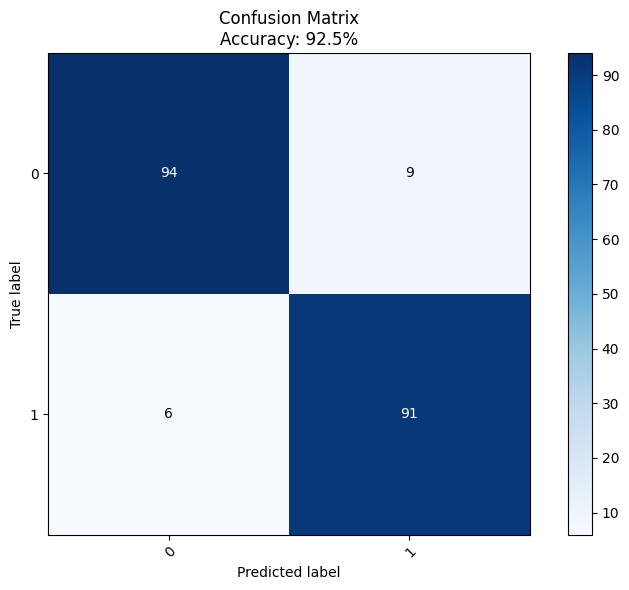


📊 Feature Importance - random_forest_classifier


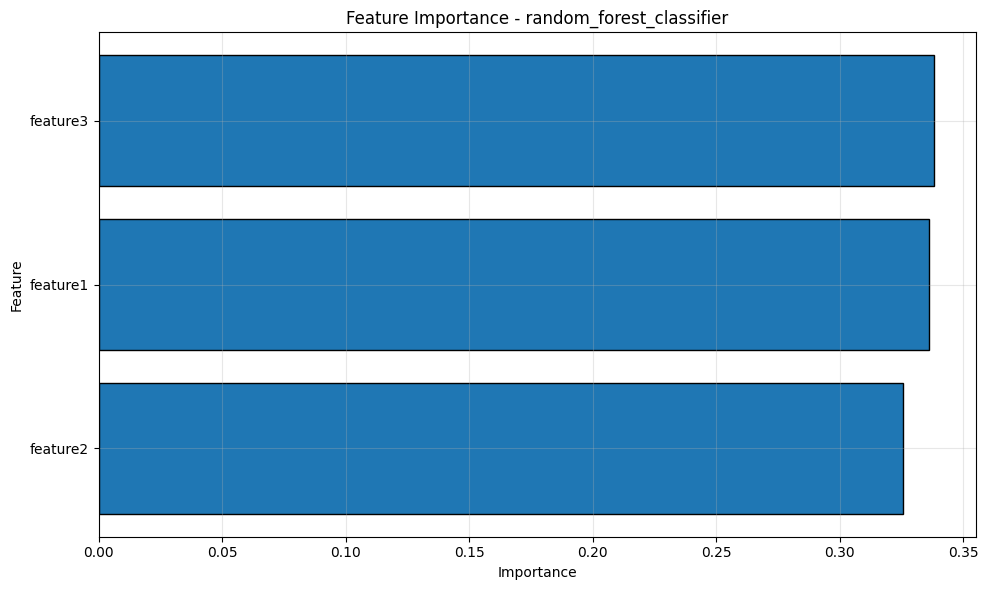

In [9]:
# Display classification charts
for chart in classification_result.artifacts.charts:
    print(f"\n📊 {chart.title or chart.chart_type}")
    if chart.description:
        print(f"   {chart.description}")
    if chart.base64_image:
        display(Image(data=base64.b64decode(chart.base64_image)))

## 4. Regression Workflow

The `run_regression` workflow handles end-to-end regression:
- Model training (Linear, Random Forest, Gradient Boosting)
- Model evaluation (RMSE, MAE, R²)
- Visualization (feature importance)

In [10]:
from stats_compass_core.workflows import run_regression, RegressionConfig
from stats_compass_core.workflows.regression import RunRegressionInput

# Use Housing dataset for regression
regression_result = run_regression(state, RunRegressionInput(
    dataframe_name="Housing",
    target_column="price",
    config=RegressionConfig(
        model_type="random_forest",
        test_size=0.2,
        generate_plots=True,
        plots=["feature_importance"],
    )
))

print(f"Status: {regression_result.status}")
print(f"Duration: {regression_result.total_duration_ms}ms")
print(f"\nSteps:")
for step in regression_result.steps:
    icon = "✓" if step.status == "success" else "✗"
    print(f"  {icon} {step.step_name}: {step.status} ({step.duration_ms}ms)")
    
    # Show metrics from evaluation step
    if step.step_name == "evaluate_model" and step.result:
        metrics = step.result
        print(f"      RMSE: {metrics.get('rmse', 'N/A'):.2f}")
        print(f"      MAE: {metrics.get('mae', 'N/A'):.2f}")
        print(f"      R²: {metrics.get('r2', 'N/A'):.4f}")

print(f"\nModels created: {regression_result.artifacts.models_created}")

Status: success
Duration: 216ms

Steps:
  ✓ bin_rare_categories: success (8ms)
  ✓ target_encode: success (7ms)
  ✓ train_model: success (138ms)
  ✓ evaluate_model: success (0ms)
      RMSE: 726632.78
      MAE: 439326.27
      R²: 0.8488
  ✓ plot_feature_importance: success (60ms)

Models created: ['random_forest_regressor_price_20251227_022527']



📊 Feature Importance - random_forest_regressor


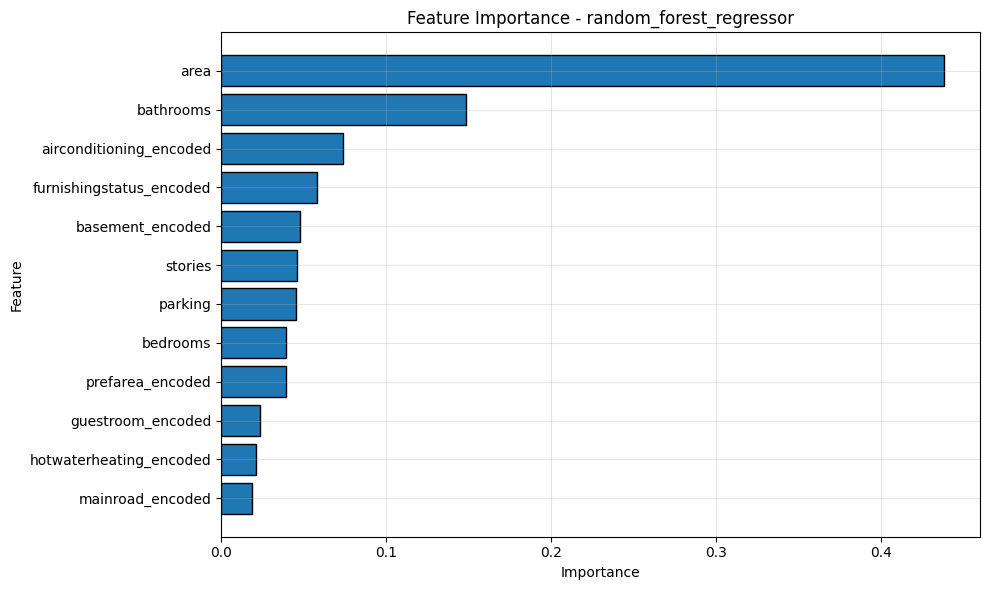

In [11]:
# Display regression charts
for chart in regression_result.artifacts.charts:
    print(f"\n📊 {chart.title or chart.chart_type}")
    if chart.description:
        print(f"   {chart.description}")
    if chart.base64_image:
        display(Image(data=base64.b64decode(chart.base64_image)))

## 5. Time Series Forecast Workflow

The `run_timeseries_forecast` workflow handles ARIMA-based forecasting:
- Stationarity testing (ADF, KPSS)
- Automatic parameter search (optional)
- ARIMA model fitting
- Forecast generation
- Forecast visualization

In [12]:
# Load stock data for time series
result = load_dataset(state, LoadDatasetInput(name="TATASTEEL", set_active=True))
print(result.message)

# Show sample of the data
df = state.get_dataframe("TATASTEEL")
print(f"\nColumns: {list(df.columns)}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")

Loaded dataset 'TATASTEEL' with 5306 rows and 15 columns.

Columns: ['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble']
Date range: 2000-01-03 to 2021-04-30


In [13]:
from stats_compass_core.workflows import run_timeseries_forecast, TimeSeriesConfig
from stats_compass_core.workflows.timeseries import RunTimeseriesForecastInput

import warnings
warnings.filterwarnings('ignore')  # Suppress statsmodels warnings for cleaner output

# Run time series forecast
ts_result = run_timeseries_forecast(state, RunTimeseriesForecastInput(
    dataframe_name="TATASTEEL",
    target_column="Close",
    date_column="Date",
    config=TimeSeriesConfig(
        date_column="Date",
        target_column="Close",
        forecast_periods=30,  # Can also use "1 month" or "2 weeks"
        auto_find_params=False,  # Set to True for automatic parameter search (slower)
        check_stationarity=True,
        generate_forecast_plot=True,
        arima_order=(5,3,3)
    )
))

print(f"Status: {ts_result.status}")
print(f"Duration: {ts_result.total_duration_ms}ms")
print(f"\nSteps:")
for step in ts_result.steps:
    icon = "✓" if step.status == "success" else "✗"
    print(f"  {icon} {step.step_name}: {step.status} ({step.duration_ms}ms)")

print(f"\nModels created: {ts_result.artifacts.models_created}")
print(f"Charts generated: {len(ts_result.artifacts.charts)}")

Status: success
Duration: 3778ms

Steps:
  ✓ validate_dates: success (0ms)
  ✓ check_stationarity: success (103ms)
  ✓ fit_arima: success (3601ms)
  ✓ forecast: success (2ms)
  ✓ plot_forecast: success (58ms)

Models created: ['arima_5_3_3_20251227_022531']
Charts generated: 1


In [14]:
# Show forecast values from the result
for step in ts_result.steps:
    if step.step_name == "forecast" and step.result:
        forecast_data = step.result
        print(f"Forecast periods: {forecast_data.get('n_periods')}")
        print(f"\nFirst 5 forecast values:")
        values = forecast_data.get('forecast_values', [])[:5]
        indices = forecast_data.get('forecast_index', [])[:5]
        for idx, val in zip(indices, values):
            print(f"  {idx}: {val:.2f}")

Forecast periods: 30

First 5 forecast values:
  5306: 1056.72
  5307: 1076.96
  5308: 1102.11
  5309: 1121.15
  5310: 1142.73



📊 ARIMA Forecast (30 periods)


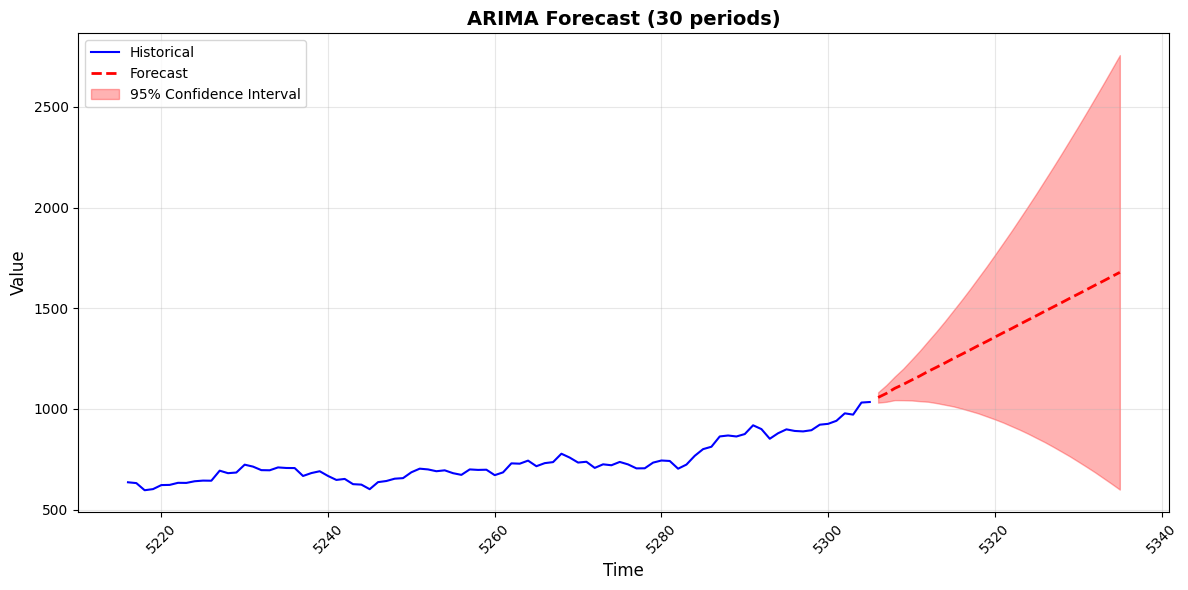

In [15]:
# Display time series forecast chart
for chart in ts_result.artifacts.charts:
    print(f"\n📊 {chart.title or chart.chart_type}")
    if chart.description:
        print(f"   {chart.description}")
    if chart.base64_image:
        display(Image(data=base64.b64decode(chart.base64_image)))

## Summary

The workflow tools provide a convenient way to perform common data science tasks:

| Workflow | Purpose | Key Config Options |
|----------|---------|-------------------|
| `run_eda_report` | Exploratory data analysis | `include_describe`, `generate_histograms`, `correlation_method` |
| `run_preprocessing` | Data cleaning | `imputation.strategy`, `outliers.method`, `dedupe` |
| `run_classification` | Classification ML | `model_type`, `test_size`, `plots` |
| `run_regression` | Regression ML | `model_type`, `test_size`, `plots` |
| `run_timeseries_forecast` | Time series | `forecast_periods`, `auto_find_params`, `check_stationarity` |

Each workflow returns a `WorkflowResult` with:
- `status`: "success", "partial_failure", or "failed"
- `steps`: List of step results with timing and details
- `artifacts`: Created DataFrames, models, and charts